In [13]:
from IPython .core. interactiveshell import InteractiveShell  # todas las salidas
InteractiveShell . ast_node_interactivity = "all"

### Es un algoritmo supervisado tanto para clasificacion como de regresion

### Support Vector Classifier

* Se resuelve utilizando el problema de Lagrange (multiplicadores de Lagrange) 
* Al resolver lo anterior, se llega al problema de Wolfe. 
* Utilizan las restricciones de Karush-Kurbn-Tucker 
* C es un hiperparametro del modelo. 

### El truco del kernel
 
* Los kernels mas usados son: polinomial, radial, red neuronal. 
* variables a considerar:
    * p predictos
    * M soportes vectoriales
    * n muestras para entrenar
    
    Numero de operaciones: $M^{3} + Mn + npM$\
    M<<<n, tiene a ser lineal de lo contrario se tendria a $M ^{3}$ que tardaria que el algoritmmo tardara demasiado en resolver. 

In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from sklearn import svm
import seaborn as sns; sns.set()
from scipy import stats

### Linear Support Vector Classifer

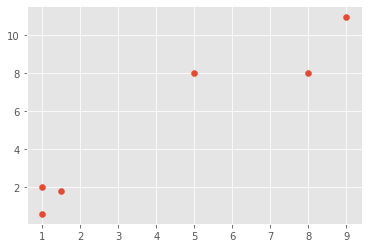

In [7]:
X = [1,5,1.5,8,1,9]
Y = [2,8,1.8,8,0.6,11]
plt.scatter(X,Y)
plt.show()

In [8]:
data = np.array(list(zip(X,Y)))
data

array([[ 1. ,  2. ],
       [ 5. ,  8. ],
       [ 1.5,  1.8],
       [ 8. ,  8. ],
       [ 1. ,  0.6],
       [ 9. , 11. ]])

In [9]:
target = [0,1,0,1,0,1]
classifier = svm.SVC(kernel='linear', C=1.0) #'linear' hace referencia de un hiperplano de dimension 2, una recta. 
classifier.fit(data,target)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [15]:
classifier.predict(np.array([0.57,0.67]).reshape(1,2))
#Clasifica que el punto que se le paso caerian en 0. 
classifier.predict(np.array([10.52,11.67]).reshape(1,2))
#Clasifica que el punto que se le paso caerian en 1. 

array([0])

array([1])

### Modelo: w0.x +w1.y +e =0
### Ecuacion del hiperplano en 2D:  y = a.x +b

In [17]:
w = classifier.coef_[0]
w #los pesos del clasificador

array([0.1380943 , 0.24462418])

In [18]:
a = -w[0]/w[1] #pendiente de la recta
b = -classifier.intercept_[0]/w[1] #intercepto en el eje y 

In [19]:
xx = np.linspace(0,10)
yy = a*xx+b

[]

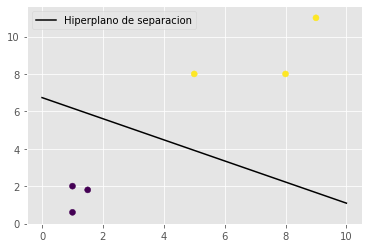

In [20]:
plt.plot(xx,yy, 'k-', label = 'Hiperplano de separacion')
plt.scatter(X,Y, c=target)
plt.legend()
plt.plot()

### Ahora utilizando un dataset 

In [24]:
from sklearn.datasets.samples_generator import make_blobs

In [25]:
X,Y =make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.6)

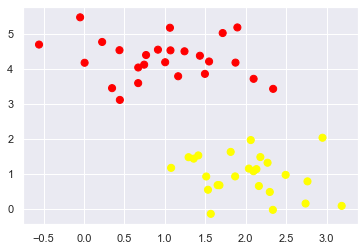

In [26]:
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap='autumn')

(-1, 3.5)

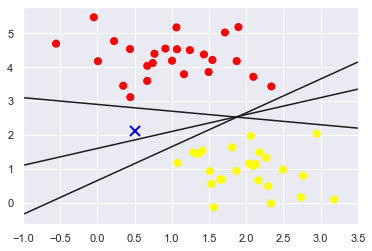

In [29]:
xx = np.linspace(-1, 3.5)
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap='autumn')
plt.plot([0.5], [2.1], 'x', color='blue', markeredgewidth=2, markersize=10)

for a, b in [(1,0.65), (0.5, 1.6), (-0.2, 2.9)]:
    yy = a*xx+b
    plt.plot(xx,yy, 'k-')
plt.xlim(-1,3.5)

### Maximizar el margen de clasificacion

(-1, 3.5)

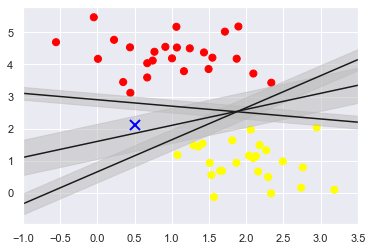

In [34]:
xx = np.linspace(-1, 3.5)
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap='autumn')
plt.plot([0.5], [2.1], 'x', color='blue', markeredgewidth=2, markersize=10)

for a, b,d in [(1,0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yy = a*xx+b
    plt.plot(xx,yy, 'k-')
    plt.fill_between(xx,yy-d,yy+d, edgecolor='none', color='#BBBBBB', alpha=0.5)
plt.xlim(-1,3.5)

### Los soporte de SVM/


In [35]:
from sklearn.svm import SVC

In [37]:
model =SVC(kernel='linear', C=1E10)
model.fit(X,Y)

SVC(C=10000000000.0, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [93]:
def plot_svc(model, ax=None, plot_support=True):
    '''Plot de la funcion de decision para una clasificacion en 2D con SVC'''
    if ax is None:
        ax=plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    #Generamos la parrilla de puntos para evaluar el modelo
    xx=np.linspace(xlim[0], xlim[1], 30)
    yy=np.linspace(ylim[0], ylim[1], 30)
    Y,X= np.meshgrid(yy,xx)
    
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P =model.decision_function(xy).reshape(X.shape)
    
    #Represetamos las fronteras y los margenes del SVC
    ax.contour(X,Y,P, colors='k', levels=[-1,0,1], alpha=0.5, linestyles =['--', '-', '--'])
    
    print('Los soportes de SVM son:\n', model.support_vectors_)
    if plot_support:
        ax.scatter(model.support_vectors_[:,0], model.support_vectors_[:,1], s=300, linewidth=1, facecolors='k')
        
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
        

Los soportes de SVM son:
 [[0.44359863 3.11530945]
 [2.33812285 3.43116792]
 [2.06156753 1.96918596]]


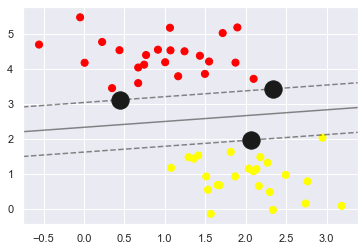

In [55]:
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap='autumn')
plot_svc(model)

In [59]:
def plot_svm(N=10, ax=None):
    X,Y =make_blobs(n_samples=200, centers=2, random_state=0, cluster_std=0.6)
    X=X[:N]
    Y=Y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X,Y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:,0], X[:,1], c=Y, s=50, cmap='autumn')
    ax.set_xlim(-1,4)
    ax.set_ylim(-1,6)
    plot_svc(model,ax)
    


Los soportes de SVM son:
 [[0.44359863 3.11530945]
 [1.25566754 3.38204112]
 [0.83685684 2.13635938]]


Text(0.5, 1.0, 'N=60')

Los soportes de SVM son:
 [[0.44359863 3.11530945]
 [1.25566754 3.38204112]
 [0.83685684 2.13635938]]


Text(0.5, 1.0, 'N=120')

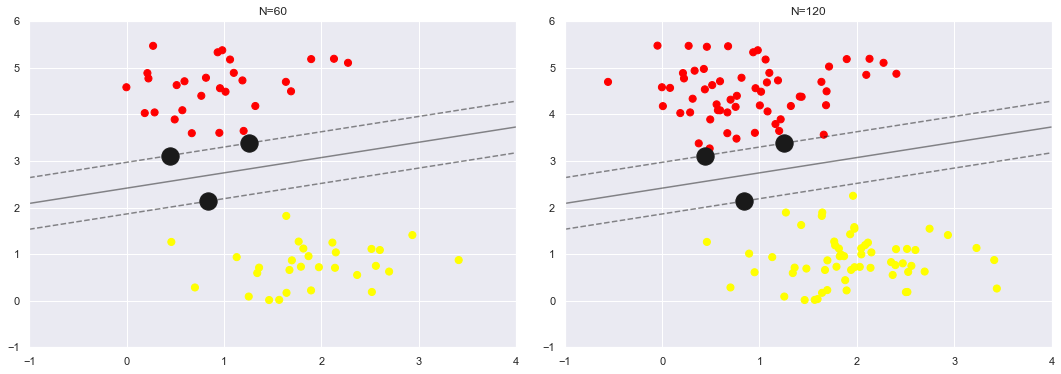

In [60]:
fig, ax = plt.subplots(1,2, figsize=(16,6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for ax_i, N in zip(ax,[60,120]):
    plot_svm(N,ax_i)
    ax_i.set_title('N={0}'.format(N))
    

In [61]:
from ipywidgets import interact, fixed

In [68]:
interact(plot_svm, N=[i for i in range(10,210,10)], ax=fixed(None))

interactive(children=(Dropdown(description='N', options=(10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 13…

<function __main__.plot_svm(N=10, ax=None)>

## Identificar fronteras no lineales(kernels no lineales)

In [69]:
from sklearn.datasets.samples_generator import make_circles

In [76]:
X,Y = make_circles(100, factor =0.1, noise=0.1)


Los soportes de SVM son:
 [[ 0.53057152  0.95191685]
 [ 0.96868173  0.42782984]
 [-1.15292755  0.08146094]
 [-0.77027388 -0.51583216]
 [ 0.45977653 -0.90600644]
 [-0.60278887  0.80268292]
 [ 0.81265462 -0.71553277]
 [ 0.95133803  0.35031143]
 [ 0.85523008  0.5537265 ]
 [-1.0885163  -0.05373738]
 [-0.89580668  0.47261981]
 [ 0.776729   -0.87221873]
 [ 0.97485387 -0.48666279]
 [ 0.81974518 -0.62007763]
 [-0.8884749  -0.19892678]
 [-0.97006568  0.42275771]
 [ 1.00567947 -0.06476257]
 [ 0.02224328  0.77727782]
 [-0.55265595  0.88399551]
 [-0.53727614 -0.75531355]
 [ 0.96822855 -0.53075187]
 [-0.02921543 -1.13754705]
 [ 0.63608427 -0.89531339]
 [ 0.27766843  0.80453863]
 [ 0.94362178  0.04723013]
 [-0.05997507  1.19331567]
 [ 0.30235299 -1.17265088]
 [ 1.11800402 -0.21489754]
 [-0.75654206 -0.64706315]
 [-0.88326729 -0.33582371]
 [ 1.14403222 -0.11350171]
 [-0.6023432   0.66378907]
 [-0.94745908 -0.4967037 ]
 [-0.36206364 -0.91150747]
 [-0.57035894 -0.74859872]
 [-0.34071421  0.88436627]
 [

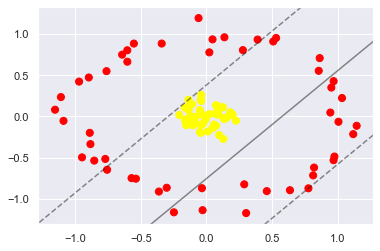

In [77]:
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap='autumn')
plot_svc(SVC(kernel='linear').fit(X,Y), plot_support=False)


In [78]:
r = np.exp(-(X**2).sum(1))
r

array([0.30493647, 0.32582897, 0.99478491, 0.97191812, 0.96051932,
       0.26292727, 0.96522095, 0.42341408, 0.3562074 , 0.36507434,
       0.97184901, 0.3096246 , 0.35780679, 0.96299331, 0.35415114,
       0.94149252, 0.96628704, 0.30490487, 0.98296727, 0.35849553,
       0.25561741, 0.30508015, 0.34767803, 0.96647117, 0.43650322,
       0.97813737, 0.98744496, 0.98703824, 0.32636088, 0.36219035,
       0.94841659, 0.99454411, 0.54626254, 0.33726825, 0.97645622,
       0.4235159 , 0.29547706, 0.93203834, 0.99851576, 0.27393434,
       0.98528636, 0.2993358 , 0.4846239 , 0.98532236, 0.97326228,
       0.40956783, 0.99054957, 0.98494551, 0.95919922, 0.23988412,
       0.99173833, 0.97631753, 0.23072531, 0.27359293, 0.96407659,
       0.95577076, 0.96687727, 0.371188  , 0.99100689, 0.40945074,
       0.9761337 , 0.98264963, 0.2666836 , 0.44778895, 0.9626643 ,
       0.9968961 , 0.91279087, 0.31841705, 0.38215234, 0.41242151,
       0.40730627, 0.46799418, 0.99176834, 0.96555482, 0.97774

In [79]:
from mpl_toolkits import mplot3d 

In [82]:
def plot_3D(elev=30, azim=30, X=X,Y=Y,r=r):
    ax = plt.subplot(projection='3d')
    ax.scatter(X[:,0], X[:,1], c=Y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    
    ax.set_xlabel('x[0]')
    ax.set_ylabel('y[1]')
    ax.set_zlabel('r')

In [86]:
interact(plot_3D, elev=[-90,-60,-30,0,30,60,90], azim=[-180,-150,-120,-90,-60,-30,0,30,60,90,120,150,180], 
         X=fixed(X), Y=fixed(Y), r=fixed(r))

interactive(children=(Dropdown(description='elev', index=4, options=(-90, -60, -30, 0, 30, 60, 90), value=30),…

<function __main__.plot_3D(elev=30, azim=30, X=array([[ 0.53057152,  0.95191685],
       [ 0.96868173,  0.42782984],
       [-0.04803913,  0.05404608],
       [ 0.12655413,  0.11165918],
       [ 0.19930755,  0.02361536],
       [-1.15292755,  0.08146094],
       [ 0.18133639,  0.05015333],
       [-0.77027388, -0.51583216],
       [ 0.45977653, -0.90600644],
       [-0.60278887,  0.80268292],
       [-0.16261589, -0.04594448],
       [ 0.81265462, -0.71553277],
       [ 0.95133803,  0.35031143],
       [-0.05031752, -0.18755523],
       [ 0.85523008,  0.5537265 ],
       [ 0.09688957, -0.22561314],
       [-0.13099179,  0.13090263],
       [-1.0885163 , -0.05373738],
       [ 0.12997095, -0.01694145],
       [-0.89580668,  0.47261981],
       [ 0.776729  , -0.87221873],
       [ 0.97485387, -0.48666279],
       [ 0.81974518, -0.62007763],
       [-0.10990556,  0.14840682],
       [-0.8884749 , -0.19892678],
       [-0.10302466, -0.10719644],
       [-0.04195607, -0.10427948],
       [

### Cambio de kernel con radial basis function 


In [89]:
rbf = SVC(kernel='rbf', C=1E6)
rbf.fit(X,Y)

SVC(C=1000000.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Los soportes de SVM son:
 [[-0.8884749  -0.19892678]
 [ 0.02224328  0.77727782]
 [-0.53727614 -0.75531355]
 [ 0.94362178  0.04723013]
 [-0.6023432   0.66378907]
 [-0.03441761 -0.8706979 ]
 [-0.76096505  0.54957326]
 [ 0.28795665 -0.82389762]
 [-0.04033706  0.26221032]
 [ 0.12872053 -0.27327552]]


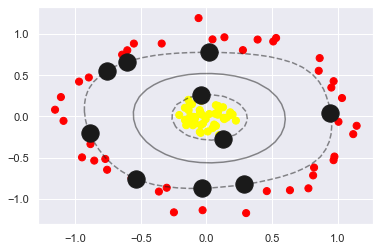

In [95]:
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap='autumn')
plot_svc(rbf)
plt.scatter(rbf.support_vectors_[:,0], rbf.support_vectors_[:,1], s=300, lw=1, facecolors='none')

## Reconocimiento facial

In [96]:
from sklearn.datasets import fetch_lfw_people

In [97]:
faces = fetch_lfw_people(min_faces_per_person=60)

In [135]:
print(faces.target_names)
faces.target.shape
faces.data.shape

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']


(1348,)

(1348, 2914)

In [101]:
print(faces.images.shape)

(1348, 62, 47)


[[], [], Text(0.5, 0, 'Colin Powell')]

[[], [], Text(0.5, 0, 'George W Bush')]

[[], [], Text(0.5, 0, 'George W Bush')]

[[], [], Text(0.5, 0, 'George W Bush')]

[[], [], Text(0.5, 0, 'Hugo Chavez')]

[[], [], Text(0.5, 0, 'George W Bush')]

[[], [], Text(0.5, 0, 'Junichiro Koizumi')]

[[], [], Text(0.5, 0, 'George W Bush')]

[[], [], Text(0.5, 0, 'Tony Blair')]

[[], [], Text(0.5, 0, 'Ariel Sharon')]

[[], [], Text(0.5, 0, 'George W Bush')]

[[], [], Text(0.5, 0, 'Donald Rumsfeld')]

[[], [], Text(0.5, 0, 'George W Bush')]

[[], [], Text(0.5, 0, 'George W Bush')]

[[], [], Text(0.5, 0, 'George W Bush')]

[[], [], Text(0.5, 0, 'Ariel Sharon')]

[[], [], Text(0.5, 0, 'Colin Powell')]

[[], [], Text(0.5, 0, 'Colin Powell')]

[[], [], Text(0.5, 0, 'George W Bush')]

[[], [], Text(0.5, 0, 'Tony Blair')]

[[], [], Text(0.5, 0, 'Colin Powell')]

[[], [], Text(0.5, 0, 'Ariel Sharon')]

[[], [], Text(0.5, 0, 'Hugo Chavez')]

[[], [], Text(0.5, 0, 'George W Bush')]

[[], [], Text(0.5, 0, 'George W Bush')]

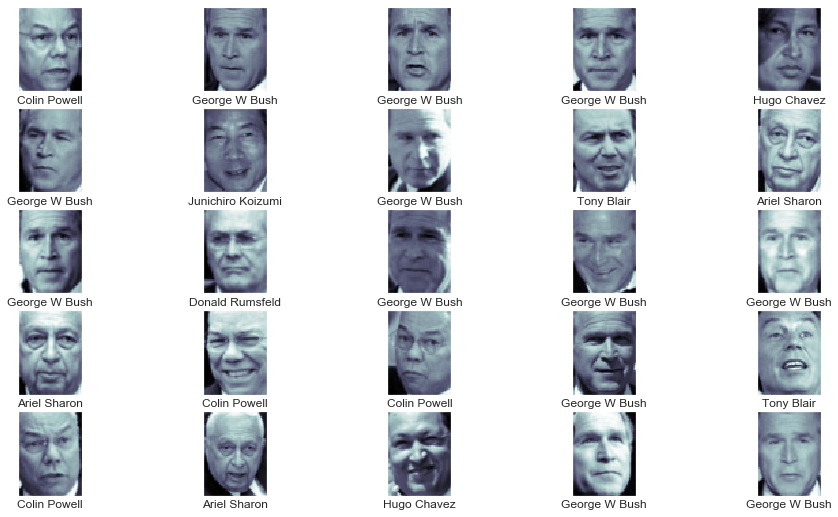

In [102]:
fig, ax = plt.subplots(5,5, figsize=(16,9))
for i, ax_i in enumerate(ax.flat):
    ax_i.imshow(faces.images[i], cmap='bone')
    ax_i.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[i]])

In [105]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

In [106]:
pca= PCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [107]:
from sklearn.model_selection import train_test_split

In [143]:
X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, test_size = 0.25, random_state=42)
X_test.shape
y_train.shape

(337, 2914)

(1011,)

In [129]:
from sklearn.model_selection import GridSearchCV

In [144]:
param_grid = {
    'svc__C' :[0.1,1,5,10,50],
    'svc__gamma' :[0.0001, 0.0005, 0.001, 0.005, 0.01]
}

grid = GridSearchCV(model, param_grid)

grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=150, random_state=42,
                                            svd_solver='auto', tol=0.0,
                                            whiten=True)),
                                       ('svc',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200,
                                            class_weight='balanced', coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='rbf', max_iter=-1,
                                            probability=False,
                                            ran

In [145]:
print(grid.best_params_)

{'svc__C': 10, 'svc__gamma': 0.001}


In [147]:
classifier = grid.best_estimator_
yfit = classifier.predict(X_test)

[[], []]

Text(0, 0.5, 'Bush')

[[], []]

Text(0, 0.5, 'Schroeder')

[[], []]

Text(0, 0.5, 'Bush')

[[], []]

Text(0, 0.5, 'Koizumi')

[[], []]

Text(0, 0.5, 'Koizumi')

[[], []]

Text(0, 0.5, 'Powell')

[[], []]

Text(0, 0.5, 'Bush')

[[], []]

Text(0, 0.5, 'Bush')

[[], []]

Text(0, 0.5, 'Bush')

[[], []]

Text(0, 0.5, 'Powell')

[[], []]

Text(0, 0.5, 'Bush')

[[], []]

Text(0, 0.5, 'Bush')

[[], []]

Text(0, 0.5, 'Sharon')

[[], []]

Text(0, 0.5, 'Bush')

[[], []]

Text(0, 0.5, 'Bush')

[[], []]

Text(0, 0.5, 'Powell')

[[], []]

Text(0, 0.5, 'Blair')

[[], []]

Text(0, 0.5, 'Rumsfeld')

[[], []]

Text(0, 0.5, 'Bush')

[[], []]

Text(0, 0.5, 'Rumsfeld')

[[], []]

Text(0, 0.5, 'Blair')

[[], []]

Text(0, 0.5, 'Blair')

[[], []]

Text(0, 0.5, 'Chavez')

[[], []]

Text(0, 0.5, 'Chavez')

[[], []]

Text(0, 0.5, 'Sharon')

[[], []]

Text(0, 0.5, 'Bush')

[[], []]

Text(0, 0.5, 'Koizumi')

[[], []]

Text(0, 0.5, 'Blair')

[[], []]

Text(0, 0.5, 'Bush')

[[], []]

Text(0, 0.5, 'Bush')

[[], []]

Text(0, 0.5, 'Sharon')

[[], []]

Text(0, 0.5, 'Koizumi')

[[], []]

Text(0, 0.5, 'Bush')

[[], []]

Text(0, 0.5, 'Bush')

[[], []]

Text(0, 0.5, 'Bush')

[[], []]

Text(0, 0.5, 'Bush')

[[], []]

Text(0, 0.5, 'Rumsfeld')

[[], []]

Text(0, 0.5, 'Bush')

[[], []]

Text(0, 0.5, 'Bush')

[[], []]

Text(0, 0.5, 'Sharon')

[[], []]

Text(0, 0.5, 'Bush')

[[], []]

Text(0, 0.5, 'Bush')

[[], []]

Text(0, 0.5, 'Blair')

[[], []]

Text(0, 0.5, 'Powell')

[[], []]

Text(0, 0.5, 'Bush')

[[], []]

Text(0, 0.5, 'Bush')

[[], []]

Text(0, 0.5, 'Sharon')

[[], []]

Text(0, 0.5, 'Rumsfeld')

Text(0.5, 0.98, 'Predicciones de las imagenes (incorrectas en rojo)')

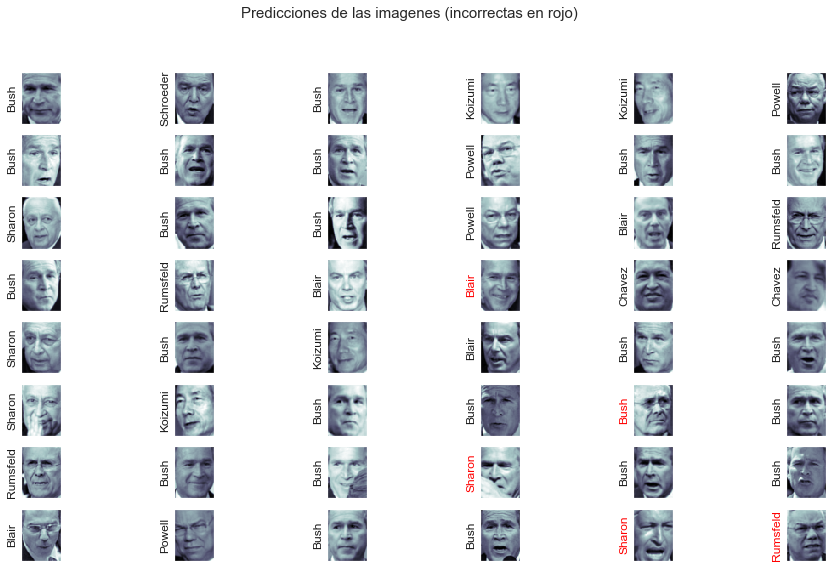

In [148]:
fig, ax = plt.subplots(8,6, figsize=(16,9))
for i, ax_i in enumerate(ax.flat):
    ax_i.imshow(X_test[i].reshape(62,47), cmap='bone')
    ax_i.set(xticks=[], yticks=[])
    ax_i.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color = 'k' if yfit[i]==y_test[i] else 'red')
fig.suptitle('Predicciones de las imagenes (incorrectas en rojo)', size=15)

In [149]:
from sklearn.metrics import classification_report


In [151]:
print(classification_report(y_test, yfit, target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.73      0.69        15
     Colin Powell       0.80      0.87      0.83        68
  Donald Rumsfeld       0.74      0.84      0.79        31
    George W Bush       0.92      0.83      0.88       126
Gerhard Schroeder       0.86      0.83      0.84        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.92      1.00      0.96        12
       Tony Blair       0.85      0.95      0.90        42

         accuracy                           0.85       337
        macro avg       0.83      0.84      0.84       337
     weighted avg       0.86      0.85      0.85       337



In [152]:
from sklearn.metrics import confusion_matrix

In [153]:
mat = confusion_matrix(y_test, yfit)

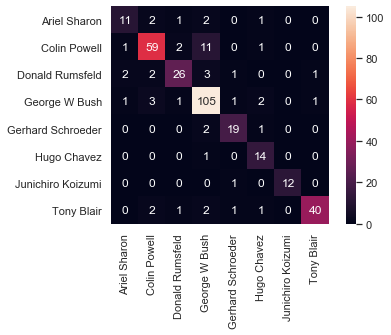

In [154]:
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True, xticklabels=faces.target_names, yticklabels=faces.target_names)

## Regresion y clasificacion con SVM

In [156]:
from sklearn import svm, datasets

In [165]:
iris=datasets.load_iris()
#print(iris)


In [172]:
X = iris.data[:, :2] #Todas las filas y las primeras 2(0,1) columnas que corrresponden a los petalos 
Y = iris.target

iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [200]:
x_min, x_max = X[:, 0].min()-1, X[:,0].max()+1
y_min, y_max = X[:, 1].min()-1, X[:,1].max()+1
h = (x_max - x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max,h))

X_plot= np.c_[xx.ravel(), yy.ravel()]

In [177]:
C=1.0
svc=svm.SVC(kernel='linear', C=C, decision_function_shape='ovr').fit(X,Y)
Ypred = svc.predict(X_plot)
Ypred = Ypred.reshape(xx.shape)

<Figure size 1152x648 with 0 Axes>

Text(0.5, 0, 'Longitud de los petalos')

Text(0, 0.5, 'Anchura de los petalos')

(3.3, 8.844000000000005)

Text(0.5, 1.0, 'SVC para las flores de Iris con Kernel Lineal')

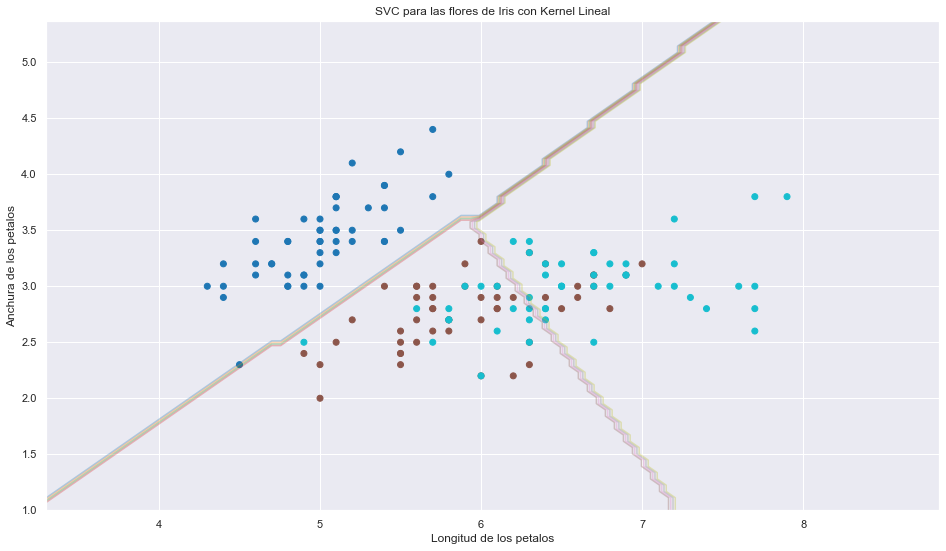

In [181]:
plt.figure(figsize = (16,9))
plt.contour(xx,yy,Ypred, cmap=plt.cm.tab10, alpha=0.3)
plt.scatter(X[:,0], X[:,1], c=Y, cmap=plt.cm.tab10)
plt.xlabel('Longitud de los petalos')
plt.ylabel('Anchura de los petalos')
plt.xlim(xx.min(), xx.max())
plt.title('SVC para las flores de Iris con Kernel Lineal')

In [201]:
C=10.0
svc=svm.SVC(kernel='rbf', gamma=0.01, C=C, decision_function_shape='ovr').fit(X,Y)
Ypred = svc.predict(X_plot)
Ypred = Ypred.reshape(xx.shape)

<Figure size 1152x648 with 0 Axes>

Text(0.5, 0, 'Longitud de los petalos')

Text(0, 0.5, 'Anchura de los petalos')

(3.3, 8.844000000000005)

Text(0.5, 1.0, 'SVC para las flores de Iris con Kernel Radial')

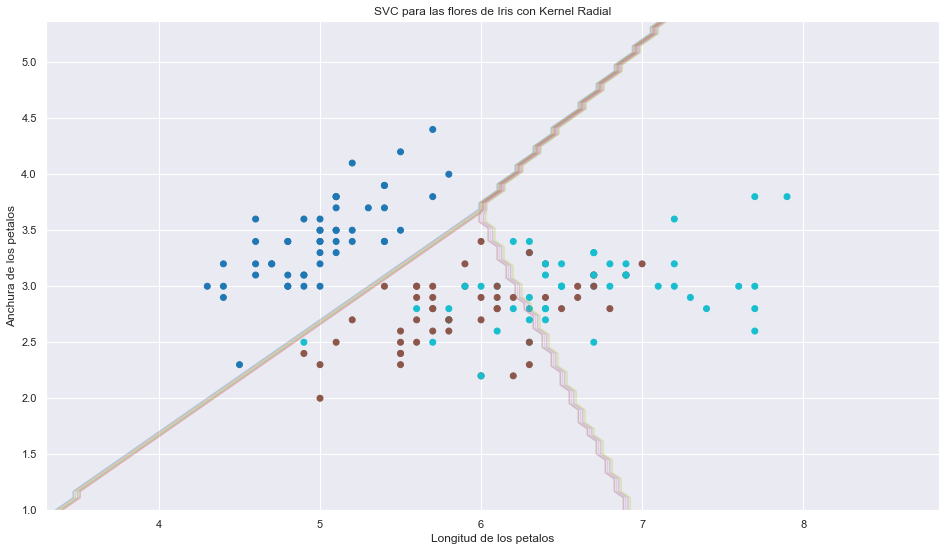

In [202]:
plt.figure(figsize = (16,9))
plt.contour(xx,yy,Ypred, cmap=plt.cm.tab10, alpha=0.3)
plt.scatter(X[:,0], X[:,1], c=Y, cmap=plt.cm.tab10)
plt.xlabel('Longitud de los petalos')
plt.ylabel('Anchura de los petalos')
plt.xlim(xx.min(), xx.max())
plt.title('SVC para las flores de Iris con Kernel Radial')

<Figure size 1152x648 with 0 Axes>

Text(0.5, 0, 'Longitud de los petalos')

Text(0, 0.5, 'Anchura de los petalos')

(3.3, 8.844000000000005)

Text(0.5, 1.0, 'SVC para las flores de Iris con Kernel Sigmoid')

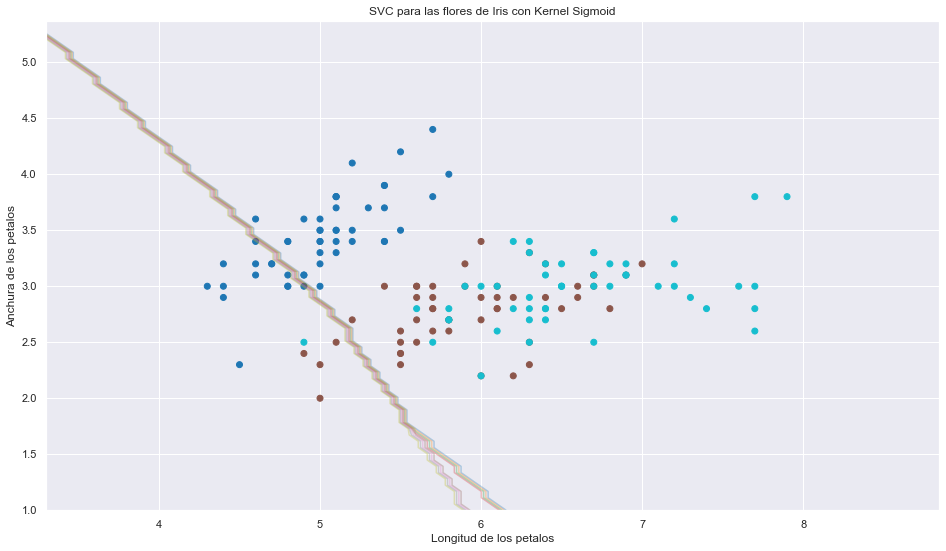

In [184]:
C=1.0
svc=svm.SVC(kernel='sigmoid', C=C, decision_function_shape='ovr').fit(X,Y)
Ypred = svc.predict(X_plot)
Ypred = Ypred.reshape(xx.shape) 

plt.figure(figsize = (16,9))
plt.contour(xx,yy,Ypred, cmap=plt.cm.tab10, alpha=0.3)
plt.scatter(X[:,0], X[:,1], c=Y, cmap=plt.cm.tab10)
plt.xlabel('Longitud de los petalos')
plt.ylabel('Anchura de los petalos')
plt.xlim(xx.min(), xx.max())
plt.title('SVC para las flores de Iris con Kernel Sigmoid')


<Figure size 1152x648 with 0 Axes>

Text(0.5, 0, 'Longitud de los petalos')

Text(0, 0.5, 'Anchura de los petalos')

(3.3, 8.844000000000005)

Text(0.5, 1.0, 'SVC para las flores de Iris con Kernel Sigmoid')

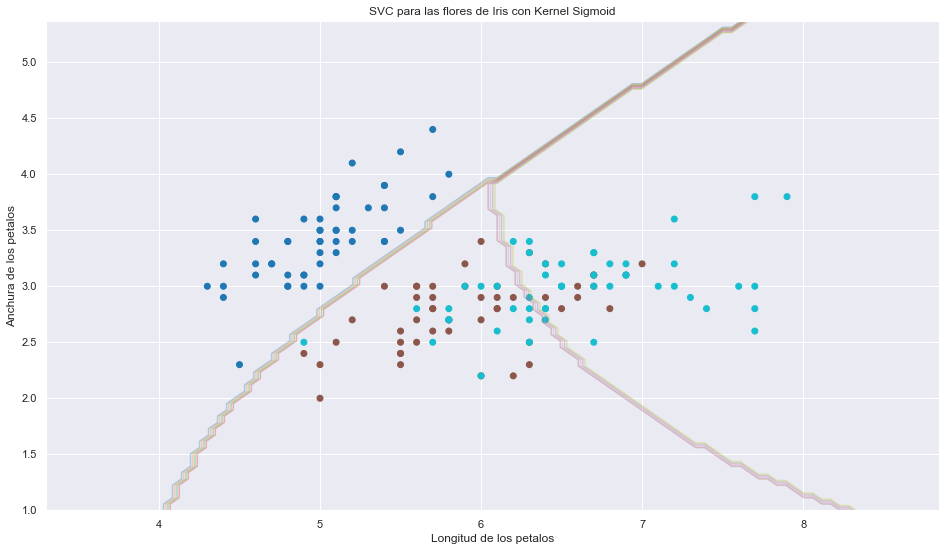

In [185]:
C=1.0
svc=svm.SVC(kernel='poly', C=C, decision_function_shape='ovr').fit(X,Y)
Ypred = svc.predict(X_plot)
Ypred = Ypred.reshape(xx.shape) 

plt.figure(figsize = (16,9))
plt.contour(xx,yy,Ypred, cmap=plt.cm.tab10, alpha=0.3)
plt.scatter(X[:,0], X[:,1], c=Y, cmap=plt.cm.tab10)
plt.xlabel('Longitud de los petalos')
plt.ylabel('Anchura de los petalos')
plt.xlim(xx.min(), xx.max())
plt.title('SVC para las flores de Iris con Kernel Sigmoid')


In [186]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.utils import shuffle


In [187]:
X, Y = shuffle(X,Y, random_state = 0)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=12, random_state=0)


In [191]:
parameters= [
    {
        'kernel':['rbf'],
        'gamma':[1e-4, 1e-3, 1e-2, 0.1, 0.2,0.5],
        'C': [1,10,100,1000]
    },
    {
        'kernel':['linear'],
        'C': [1,10,100,1000]
    }
    
]

In [193]:
clf = GridSearchCV(svm.SVC(decision_function_shape='ovr'), param_grid=parameters, cv=5)
clf.fit(X,Y)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.5],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [194]:
clf.best_params_

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

In [195]:
means=clf.cv_results_['mean_test_score']
stds=clf.cv_results_['std_test_score']
params = clf.cv_results_['params']
for m,s,p in zip(means, stds, params):
    print('%0.3f (+/-%0.3f) para %r'%(m,2*s,p))

0.747 (+/-0.124) para {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.747 (+/-0.124) para {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.747 (+/-0.124) para {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.807 (+/-0.129) para {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.787 (+/-0.124) para {'C': 1, 'gamma': 0.2, 'kernel': 'rbf'}
0.780 (+/-0.116) para {'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}
0.747 (+/-0.124) para {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.747 (+/-0.124) para {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.813 (+/-0.124) para {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.773 (+/-0.098) para {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.780 (+/-0.116) para {'C': 10, 'gamma': 0.2, 'kernel': 'rbf'}
0.767 (+/-0.126) para {'C': 10, 'gamma': 0.5, 'kernel': 'rbf'}
0.747 (+/-0.124) para {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.813 (+/-0.124) para {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.760 (+/-0.107) para {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
0.780 (+/-0.080) para {'C': 100, 'gamma'

In [196]:
y_pred = clf.predict(X_test)


In [197]:
print(classification_report(Y_test, y_pred, target_names=['setosa', 'versicolor', 'virginica']))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         3
  versicolor       0.25      0.50      0.33         2
   virginica       0.80      0.57      0.67         7

    accuracy                           0.67        12
   macro avg       0.68      0.69      0.67        12
weighted avg       0.76      0.67      0.69        12



### Que hacer cuando tenga que hacer analisis de datos?

### Resumen final del dataset irirs

In [217]:
def svm_iris(C=1.0, gamma=0.01, kernel='rbf'):
    from sklearn import svm, datasets
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    from matplotlib import style
    style.use('ggplot')
    from sklearn import svm
    import seaborn as sns; sns.set()
    from scipy import stats

    iris=datasets.load_iris()
    #print(iris)
    X = iris.data[:, :2] #Todas las filas y las primeras 2(0,1) columnas que corrresponden a los petalos 
    Y = iris.target

    x_min, x_max = X[:, 0].min()-1, X[:,0].max()+1
    y_min, y_max = X[:, 1].min()-1, X[:,1].max()+1
    h = (x_max - x_min)/100
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max,h))

    X_plot= np.c_[xx.ravel(), yy.ravel()]

    #C=1.0
    svc=svm.SVC(kernel=kernel, C=C, gamma=gamma, decision_function_shape='ovr').fit(X,Y)
    Ypred = svc.predict(X_plot)
    Ypred = Ypred.reshape(xx.shape)

    plt.figure(figsize = (16,9))
    plt.contour(xx,yy,Ypred, cmap=plt.cm.tab10, alpha=0.3)
    plt.scatter(X[:,0], X[:,1], c=Y, cmap=plt.cm.tab10)
    plt.xlabel('Longitud de los petalos')
    plt.ylabel('Anchura de los petalos')
    plt.xlim(xx.min(), xx.max())
    plt.title('SVC para las flores de Iris con Kernel ' +kernel)

In [210]:
from ipywidgets import interact, fixed

In [218]:
interact(svm_iris, C = [0.01, 0.1, 1,10,100,1000, 1E6], 
         gamma = [1e-5,1e-4, 1e-3, 1e-2, 0.1, 0.2,0.5, 0.99],
        kernel = ['linear', 'rbf', 'poly', 'sigmoid', 'precomputed'])

interactive(children=(Dropdown(description='C', index=2, options=(0.01, 0.1, 1, 10, 100, 1000, 1000000.0), val…

<function __main__.svm_iris(C=1.0, gamma=0.01, kernel='rbf')>

## SVM para regresion

In [220]:
X = np.sort(5*np.random.rand(200,1), axis =0)
Y = np.sin(X).ravel()
Y[::5 ] += 3*(0.5-np.random.rand(40))
    

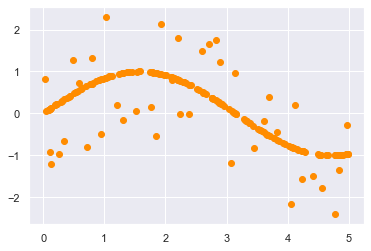

In [221]:
plt.scatter(X,Y, color = 'darkorange', label='data')

In [222]:
from sklearn.svm import SVR

In [228]:
C=1E3
svr_lin = SVR(kernel='linear', C=C)
svr_rbf = SVR(kernel='rbf', C=C, gamma = 0.2)
svr_pol = SVR(kernel='poly', C=C, degree=9)


In [229]:
y_lin = svr_lin.fit(X,Y).predict(X)
y_rbf = svr_rbf.fit(X,Y).predict(X)
y_pol = svr_pol.fit(X,Y).predict(X)

<Figure size 1152x648 with 0 Axes>

Text(0.5, 0, 'x')

Text(0, 0.5, 'y')

Text(0.5, 1.0, 'Support Verctor Machine')

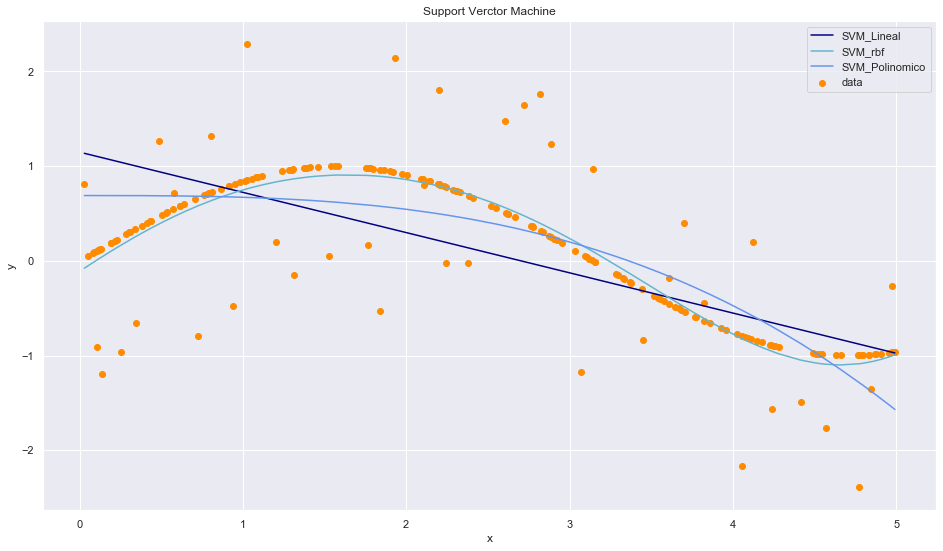

In [226]:
lw = 2
plt.figure(figsize=(16,9))
plt.scatter(X,Y, color='darkorange', label='data')
plt.plot(X, y_lin, color = 'navy', label='SVM_Lineal')
plt.plot(X, y_rbf, color = 'c', label='SVM_rbf')
plt.plot(X, y_pol, color = 'cornflowerblue', label='SVM_Polinomico')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Support Verctor Machine')
plt.legend()
plt.show()
